# Author: Shobhit Sinha 

# Task-1 : Prediction Using Supervised ML 

## Importing libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the dataset from the link 

In [43]:
#Reading data from csv file 

url= 'http://bit.ly/w-data'
data=pd.read_csv(url)
print('Data imported successfully')
data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [54]:
data.shape

(25, 2)

In [56]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [58]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### In the dataset 25 students, number of hours studied by the student and marks are already given.

### We have to predict the percentage of the student based on number of hours the student studies.

# Data Visualization

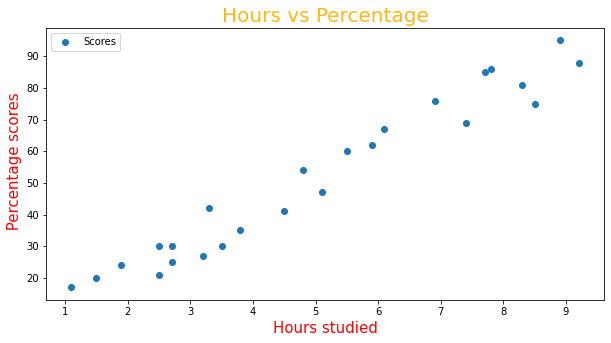

In [52]:
# Plotting the score to visualize it on graph 

data.plot(x='Hours', y='Scores', style='o',figsize=(10,5))
plt.title('Hours vs Percentage', color='#FBB917', size=20)
plt.xlabel('Hours studied',color="red",size=15)
plt.ylabel(' Percentage scores',color="red",size=15)

plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Data preprocessing

In [51]:
#Dividing data inputs and outputs 

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

## Splitting the data using Train Test Split

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the Algorithm

In [12]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X_train,y_train)
print('Training complete.')

Training complete.


## Plotting for test data 

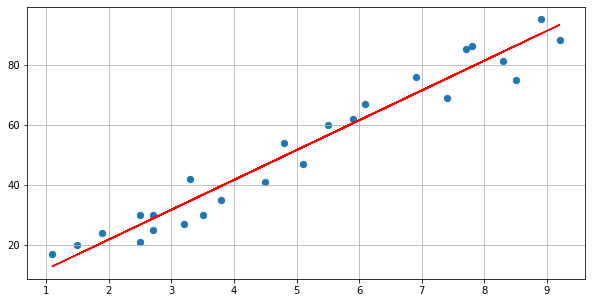

In [62]:
#Plotting the regression line

line = reg.coef_*X+reg.intercept_

#Plotting for the test data
plt.figure(figsize=(10,5))
plt.scatter(X,y,s=40)
plt.grid(True)
plt.plot(X,line,color='red');
plt.show()


## Calculating the accuracy of the model on train set

Train set Score
0.9515510725211552


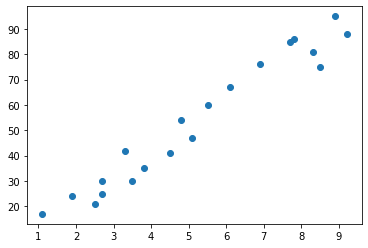

In [30]:
plt.scatter(X_train,y_train)
print("Train set Score")
print(reg.score(X_train,y_train))


## Calculating the accuracy of the model on test set

Test Score
0.9454906892105356


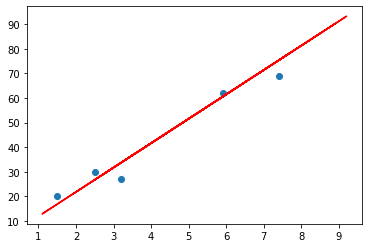

In [64]:
print("Test Score")
print(reg.score(X_test,y_test))
plt.scatter(X_test,y_test)
plt.plot(X_train,reg.predict(X_train),color="r")

# Making Predictions on Test Data

In [60]:
print(X_test) #Testing data -In hours

y_pred = reg.predict(X_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [61]:
#Comparing Actual v/s Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Calculating predicted score of the model for 9.25 hours

In [66]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
print("Hence if a student studies for {0} Hours then his score will be {1:.2f}%".format(hours,own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
Hence if a student studies for 9.25 Hours then his score will be 93.69%


## Calculating the mean absolute error of the model

In [39]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
R2 Score: 0.9454906892105356
